In [1]:
# 这是一个简单的规则
# 判断uvxy 和 spy 是否同方向了，并作出操作

0.7114135197
-0.3049975019064398
0.09473778650689475


In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels
from statsmodels.tsa.stattools import coint
import pandas as pd
import scipy.stats as st


In [3]:

msft = yf.Ticker("UVXY")

# get stock info
# print(msft.info)

# get historical market data
hist = msft.history(period="300d")

In [4]:
hist.shape

(300, 7)

In [5]:
hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-15,11.01,11.07,10.84,10.97,13842300,0,0
2020-01-16,10.73,10.76,10.52,10.58,12446400,0,0
2020-01-17,10.56,10.91,10.54,10.62,12949300,0,0
2020-01-21,10.82,10.84,10.40,10.74,16445900,0,0
2020-01-22,10.45,10.86,10.44,10.83,13941100,0,0
2020-01-23,11.09,11.38,10.75,10.76,17442600,0,0
2020-01-24,10.55,12.06,10.49,11.72,39095500,0,0
2020-01-27,13.23,13.55,12.79,13.55,41665200,0,0
2020-01-28,13.06,13.19,12.27,12.38,24530800,0,0


In [6]:
hist['gains'] = (hist.Close - hist.Close.shift(1))/hist.Close.shift(1) * 100

In [7]:
hist.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains
Date,,,,,,,,
2021-03-11,8.05,8.07,7.85,7.90,57751800,0,0,-4.242423
2021-03-12,8.15,8.19,7.71,7.74,62128900,0,0,-2.025321
2021-03-15,7.67,7.76,7.01,7.06,73132400,0,0,-8.785528
2021-03-16,7.03,7.07,6.74,7.06,77301500,0,0,0.000000
2021-03-17,7.16,7.22,6.57,6.58,80848800,0,0,-6.798867
2021-03-18,6.80,7.23,6.59,7.14,92998000,0,0,8.510638
2021-03-19,7.06,7.35,6.67,6.72,84159700,0,0,-5.882354
2021-03-22,6.60,6.66,5.99,6.05,65046900,0,0,-9.970232
2021-03-23,6.12,6.66,6.09,6.50,75118300,0,0,7.438013


<AxesSubplot:xlabel='Date'>

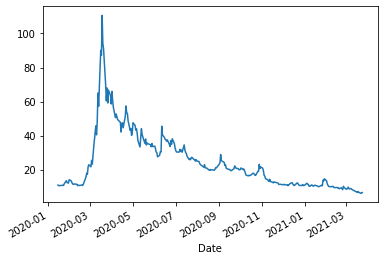

In [8]:
hist.Close.plot()

In [9]:
hist['gains'].describe()

count    299.000000
mean       0.218802
std        9.341211
min      -23.246625
25%       -4.955295
50%       -1.635108
75%        2.732458
max       57.477283
Name: gains, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gains', ylabel='Density'>

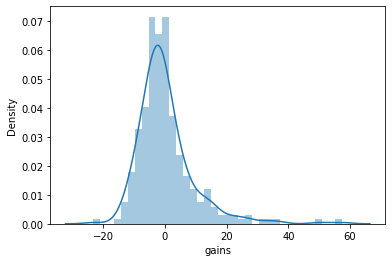

In [10]:
sns.distplot(hist.gains)

In [11]:
st.norm.cdf(-5, hist['gains'].mean(), hist['gains'].std())

0.2881880884822958

In [12]:
spy = yf.Ticker("SPY")
spy_hist = spy.history(period="300d")


In [13]:
spy_hist['gains'] = (spy_hist.Close - spy_hist.Close.shift(1))/spy_hist.Close.shift(1) * 100
spy_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains
Date,,,,,,,,
2020-01-15,320.299799,321.933815,320.211741,321.121704,72056600,0.000,0,NaN
2020-01-16,322.599212,323.792938,322.354597,323.792938,54050300,0.000,0,0.831845
2020-01-17,324.556166,325.025809,323.724466,324.800781,95846000,0.000,0,0.311262
2020-01-21,323.773385,325.025817,323.695121,324.164764,77742400,0.000,0,-0.195818
2020-01-22,325.084468,325.779198,324.037535,324.203857,48914900,0.000,0,0.012060
...,...,...,...,...,...,...,...,...
2021-03-18,393.192202,395.424880,389.474368,390.201996,115112500,0.000,0,-1.454969
2021-03-19,389.880005,391.570007,387.149994,389.480011,112777800,1.278,0,-0.185028
2021-03-22,390.029999,394.070007,389.970001,392.589996,73778600,0.000,0,0.798497


In [14]:
spy_hist['gains'].describe()

count    299.000000
mean       0.082600
std        1.980154
min      -10.942361
25%       -0.570392
50%        0.210377
75%        0.937709
max        9.060331
Name: gains, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gains', ylabel='Density'>

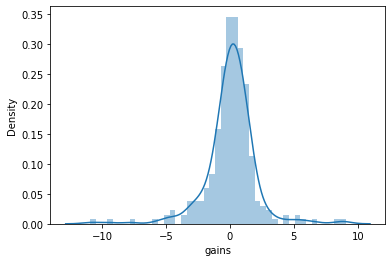

In [15]:
sns.distplot(spy_hist.gains)

In [16]:
st.norm.cdf(-1, spy_hist['gains'].mean(), spy_hist['gains'].std())

0.29228376129056566

<AxesSubplot:xlabel='Date'>

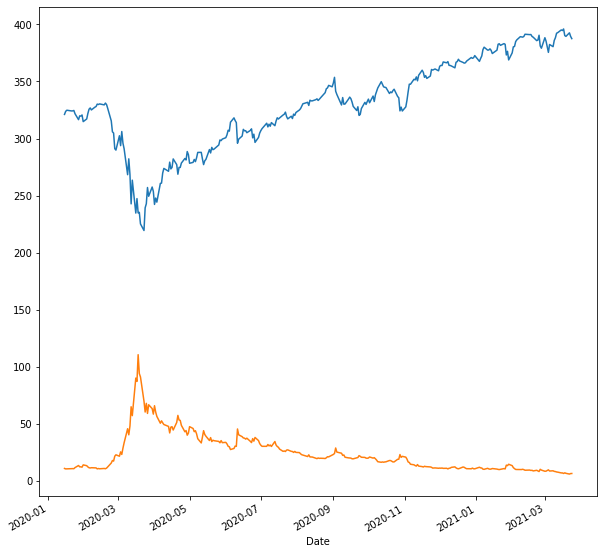

In [17]:
spy_hist.Close.plot(figsize=(10,10))
hist.Close.plot()

In [18]:
np.corrcoef(spy_hist.Close, hist.Close)

array([[ 1.        , -0.88839309],
       [-0.88839309,  1.        ]])

In [19]:
spy_hist.gains.fillna(0, inplace=True)
hist.gains.fillna(0, inplace=True)

<AxesSubplot:xlabel='Date'>

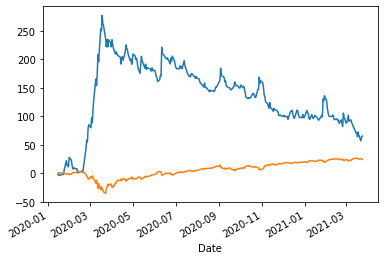

In [20]:
hist.gains.cumsum().plot()
spy_hist.gains.cumsum().plot()

In [21]:
# 差分
hist['close_diff']  = hist.Close - hist.Close.shift(1) + 1
spy_hist['close_diff']  = spy_hist.Close - spy_hist.Close.shift(1) + 1

hist.dropna(inplace=True)
spy_hist.dropna(inplace=True)

hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains,close_diff
Date,,,,,,,,,
2020-01-16,10.73,10.76,10.52,10.58,12446400,0,0,-3.555153,0.61
2020-01-17,10.56,10.91,10.54,10.62,12949300,0,0,0.378071,1.04
2020-01-21,10.82,10.84,10.40,10.74,16445900,0,0,1.129942,1.12
2020-01-22,10.45,10.86,10.44,10.83,13941100,0,0,0.837990,1.09
2020-01-23,11.09,11.38,10.75,10.76,17442600,0,0,-0.646350,0.93


In [22]:
spy_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,gains,close_diff
Date,,,,,,,,,
2020-01-16,322.599212,323.792938,322.354597,323.792938,54050300,0.0,0,0.831845,3.671234
2020-01-17,324.556166,325.025809,323.724466,324.800781,95846000,0.0,0,0.311262,2.007843
2020-01-21,323.773385,325.025817,323.695121,324.164764,77742400,0.0,0,-0.195818,0.363983
2020-01-22,325.084468,325.779198,324.037535,324.203857,48914900,0.0,0,0.012060,1.039093
2020-01-23,323.509193,325.016034,322.315467,324.575714,51963000,0.0,0,0.114698,1.371857


In [23]:
score, pvalue, _ = coint(hist.gains, spy_hist.gains)
print(score, pvalue)

score, pvalue, _ = coint(hist.Close, spy_hist.Close)
print(score, pvalue)

score, pvalue, _ = coint(hist.close_diff, spy_hist.close_diff)
print(score, pvalue)

-4.7325797104661 0.0004952253939702834
-3.262491808821162 0.060083867608831686
-11.733539954142985 1.5500547562304306e-20


In [24]:
print(np.corrcoef(hist.Close, spy_hist.Close))
print(np.corrcoef(hist.close_diff, spy_hist.close_diff))
print(np.corrcoef(spy_hist.gains, hist.gains))

[[ 1.         -0.88992982]
 [-0.88992982  1.        ]]
[[ 1.         -0.68694075]
 [-0.68694075  1.        ]]
[[ 1.         -0.76804617]
 [-0.76804617  1.        ]]


In [25]:
hist.reset_index(inplace=True)
spy_hist.reset_index(inplace=True)

In [26]:
col = ['Date','gains','Close','close_diff']
data = pd.merge(hist[col], spy_hist[col],suffixes=['_uvxy','_spy'], on='Date')
data.set_index(keys='Date')

,gains_uvxy,Close_uvxy,close_diff_uvxy,gains_spy,Close_spy,close_diff_spy
Date,,,,,,
2020-01-16,-3.555153,10.58,0.61,0.831845,323.792938,3.671234
2020-01-17,0.378071,10.62,1.04,0.311262,324.800781,2.007843
2020-01-21,1.129942,10.74,1.12,-0.195818,324.164764,0.363983
2020-01-22,0.837990,10.83,1.09,0.012060,324.203857,1.039093
2020-01-23,-0.646350,10.76,0.93,0.114698,324.575714,1.371857
...,...,...,...,...,...,...
2021-03-18,8.510638,7.14,1.56,-1.454969,390.201996,-4.761139
2021-03-19,-5.882354,6.72,0.58,-0.185028,389.480011,0.278015
2021-03-22,-9.970232,6.05,0.33,0.798497,392.589996,4.109985


In [27]:
# data['rate'] = (data.gains_uvxy+0.1) / (data.gains_spy+0.1)
data['rate'] = data.gains_uvxy - data.gains_spy
# data['rate'] = data.close_diff_uvxy - data.close_diff_spy

data[data['rate']>0]

,Date,gains_uvxy,Close_uvxy,close_diff_uvxy,gains_spy,Close_spy,close_diff_spy,rate
1,2020-01-17,0.378071,10.62,1.04,0.311262,324.800781,2.007843,0.066810
2,2020-01-21,1.129942,10.74,1.12,-0.195818,324.164764,0.363983,1.325760
3,2020-01-22,0.837990,10.83,1.09,0.012060,324.203857,1.039093,0.825931
5,2020-01-24,8.921933,11.72,1.96,-0.889316,321.689209,-1.886505,9.811250
6,2020-01-27,15.614333,13.55,2.83,-1.602933,316.532745,-4.156464,17.217267
...,...,...,...,...,...,...,...,...
286,2021-03-08,2.293576,8.92,1.20,-0.497879,380.473846,-0.903778,2.791455
292,2021-03-16,0.000000,7.06,1.00,-0.126136,394.617523,0.501617,0.126136
294,2021-03-18,8.510638,7.14,1.56,-1.454969,390.201996,-4.761139,9.965606
297,2021-03-23,7.438013,6.50,1.45,-0.787080,389.500000,-2.089996,8.225093


In [28]:
data.rate.describe()

count    299.000000
mean       0.136202
std       10.935831
min      -22.688243
25%       -5.503552
50%       -1.922432
75%        2.999818
max       68.419644
Name: rate, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

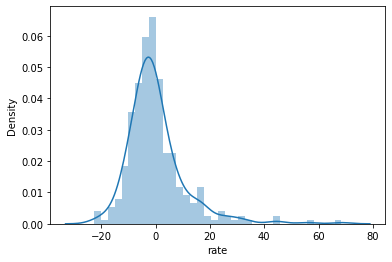

In [29]:
sns.distplot(data.rate)

In [30]:
data.fillna(0,inplace=True)
data.isna().sum()

Date               0
gains_uvxy         0
Close_uvxy         0
close_diff_uvxy    0
gains_spy          0
Close_spy          0
close_diff_spy     0
rate               0
dtype: int64

In [31]:
print((data.rate>50).sum())
# data = data[abs(data['rate'])<50]
(data.rate>50).sum()

2


2

data.rate.plot()
plt.axhline(data.rate.mean(), color='red', linestyle='--') 

0.13620168975453678 10.93583084850419


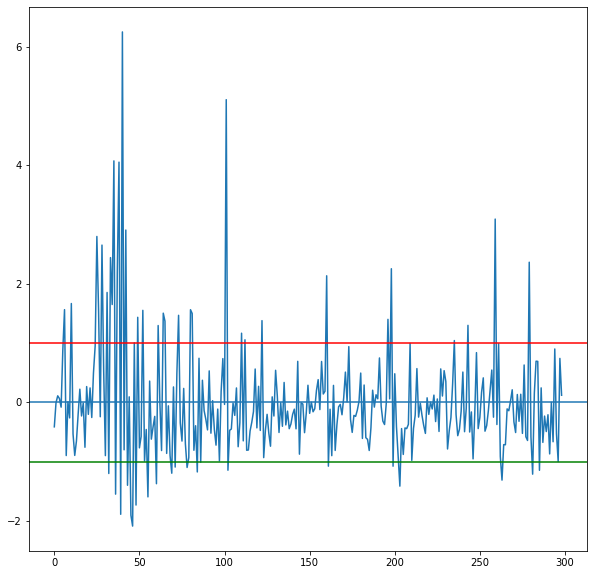

In [32]:
def zscore(series):
    print(series.mean(), series.std())
    return (series - series.mean()) / np.std(series)

z_score = zscore(data.rate)
z_score.plot(figsize=(10,10))
plt.axhline(z_score.mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

# 开始预测

(299,)
(200,) (99,)


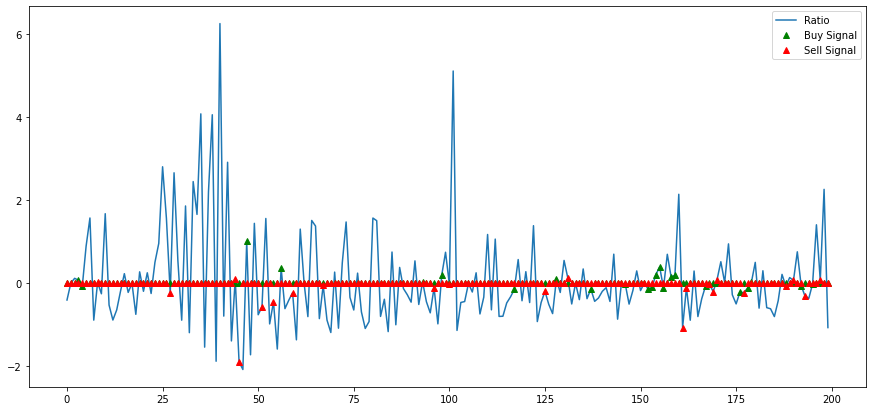

In [33]:
print(z_score.shape)
train = z_score[:200]
test = z_score[200:]
print(train.shape, test.shape)

plt.figure(figsize=(15,7))
train.plot()

buy = train.copy()
sell = train.copy()

# buy[train>-1] = 0
# sell[train<1] = 0
buy[~((data['gains_uvxy']>-1) & (data['gains_spy']>0))] = 0
sell[~((data['gains_uvxy']<1) & (data['gains_spy']<0))] = 0



buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,data.rate.min(),data.rate.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

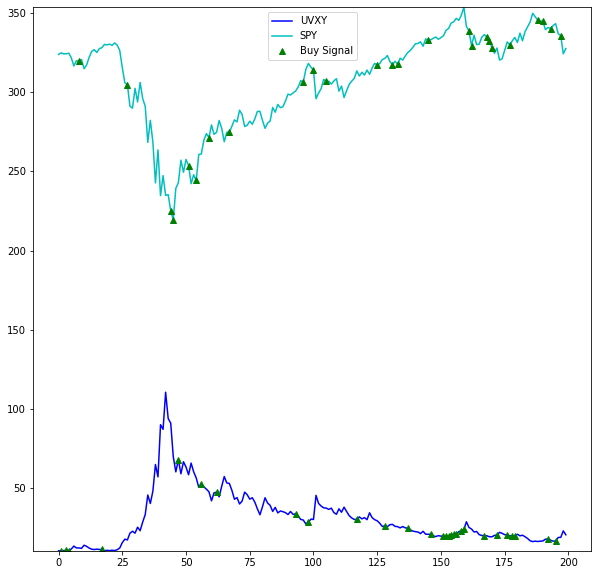

In [34]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(10,10))
S1 = hist.iloc[:200].Close
S2 = spy_hist.iloc[:200].Close

S1.plot(color='b')
S2.plot(color='c')

buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR.plot(color='g', linestyle='None', marker='^')
# sellR.plot(color='r', linestyle='None', marker='^')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()),max(S1.max(),S2.max())))
plt.legend(['UVXY','SPY', 'Buy Signal', 'Sell Signal'])
plt.show()

In [40]:
# Trade using a simple strategy
def trade(data, window1, window2):
    
    S1 = data['gains_uvxy']
    S2 = data['gains_spy']
    
    close = data['Close_uvxy']
    date = data['Date']
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(S1)):
        # buy
        if S1[i]>1 and S2[i]>0:
          
            if countS1<0:
                money -= close[i]*abs(countS1)
                countS1 = 0
            
            money -= close[i]
            countS1 += 1
                
            print('Buying volatility %s at %f %f %s %s'%(date[i], close[i], money+countS1*close[i], countS1,countS2))
        elif S1[i]<0 and S2[i]<0:
            if countS1>0:
                money += close[i] * countS1
                countS1 = 0
            
            money += close[i]
            countS1 -= 1
                
            print('Selling volatility %s at %f %f %s %s'%(date[i], close[i], money+countS1*close[i], countS1,countS2))
            
   
            
    return money+countS1*close.iloc[-1]
trade(data.iloc[:200], 5, 60)

Selling volatility 2020-02-26 00:00:00 at 17.420000 0.000000 -1 0
Selling volatility 2020-03-20 00:00:00 at 91.110001 -73.690001 -2 0
Selling volatility 2020-03-23 00:00:00 at 69.930000 -31.330000 -3 0
Buying volatility 2020-03-25 00:00:00 at 68.000000 -25.539999 1 0
Selling volatility 2020-03-31 00:00:00 at 58.560001 -34.979998 -1 0
Selling volatility 2020-04-03 00:00:00 at 56.590000 -33.009996 -2 0
Buying volatility 2020-04-07 00:00:00 at 52.700001 -25.229998 1 0
Selling volatility 2020-04-13 00:00:00 at 47.799999 -30.129999 -1 0
Selling volatility 2020-04-23 00:00:00 at 53.099998 -35.429998 -2 0
Selling volatility 2020-06-04 00:00:00 at 29.980000 10.809999 -3 0
Buying volatility 2020-06-08 00:00:00 at 28.469999 15.340000 1 0
Selling volatility 2020-06-10 00:00:00 at 30.340000 17.210001 -1 0
Selling volatility 2020-06-17 00:00:00 at 37.529999 10.020002 -2 0
Selling volatility 2020-07-16 00:00:00 at 29.500000 26.080000 -3 0
Buying volatility 2020-07-21 00:00:00 at 26.299999 35.680002 

50.740007400512695

In [42]:
data[hist['Date'] == "2020-03-25"]

,Date,gains_uvxy,Close_uvxy,close_diff_uvxy,gains_spy,Close_spy,close_diff_spy,rate
47,2020-03-25,12.582779,68.0,8.599998,1.497019,242.894791,4.58255,11.085759


In [43]:
data[spy_hist['Date'] == "2020-03-24"]

,Date,gains_uvxy,Close_uvxy,close_diff_uvxy,gains_spy,Close_spy,close_diff_spy,rate
46,2020-03-24,-13.627912,60.400002,-8.529999,9.060331,239.312241,20.88118,-22.688243


In [44]:
data[spy_hist['Date'] == "2020-03-26"]

,Date,gains_uvxy,Close_uvxy,close_diff_uvxy,gains_spy,Close_spy,close_diff_spy,rate
48,2020-03-26,-12.970588,59.18,-7.82,5.838977,257.077362,15.182571,-18.809565
